### ✅ Step 1: Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

In [8]:
# # Show all rows
# pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Show full width (no column truncation)
# pd.set_option('display.width', None)

# Prevent scientific notation (optional)
pd.set_option('display.float_format', '{:.2f}'.format)


# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.float_format')


### 📥 Step 2: Load and Inspect Dataset

In [9]:
# Read the DataFrame

df = pd.read_csv(r"C:\Users\atulm\Desktop\Data Analytics\Python\csv file\sales 1.csv")
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2/19/2016,2016.00,February,29.00,F,United States,Washington,Accessories,Tires and Tubes,1.00,80.00,109.00,80.00,109.00
1,1,2/20/2016,2016.00,February,29.00,F,United States,Washington,Clothing,Gloves,2.00,24.50,28.50,49.00,57.00
2,2,2/27/2016,2016.00,February,29.00,F,United States,Washington,Accessories,Tires and Tubes,3.00,3.67,5.00,11.00,15.00
3,3,03-12-2016,2016.00,March,29.00,F,United States,Washington,Accessories,Tires and Tubes,2.00,87.50,116.50,175.00,233.00
4,4,03-12-2016,2016.00,March,29.00,F,United States,Washington,Accessories,Tires and Tubes,3.00,35.00,41.67,105.00,125.00


In [10]:
# Quick look
print("\nShape:", df.shape)
print("\nInfo:")
df.info()


Shape: (34867, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.0+ MB


In [11]:
# Summary statistics
print("\nSummary:")
df.describe()


Summary:


,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,34867.00,34866.00,34866.00,34866.00,34866.00,34866.00,34866.00,34867.00
mean,17433.00,2015.57,36.38,2.00,349.88,389.23,576.00,640.87
std,10065.38,0.50,11.11,0.81,490.02,525.32,690.50,736.64
min,0.00,2015.00,17.00,1.00,0.67,0.67,2.00,2.00
25%,8716.50,2015.00,28.00,1.00,45.00,53.67,85.00,102.00
50%,17433.00,2016.00,35.00,2.00,150.00,179.00,261.00,319.00
75%,26149.50,2016.00,44.00,3.00,455.00,521.00,769.00,902.00
max,34866.00,2016.00,87.00,3.00,3240.00,5082.00,3600.00,5082.00


### 🧹 Step 3: Data Cleaning & Preprocessing

In [12]:
# Drop unnecessary columns
df.drop(columns=['index','Cost'], inplace=True)
df.head(1)

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Revenue
0,2/19/2016,2016.00,February,29.00,F,United States,Washington,Accessories,Tires and Tubes,1.00,80.00,109.00,109.00


In [47]:
df["Date"]

0       2016-02-19
1       2016-02-20
2       2016-02-27
3       2016-12-03
4       2016-12-03
           ...    
34862   2016-07-02
34863   2015-03-13
34864   2015-05-04
34865   2015-08-30
34866   2016-01-03
Name: Date, Length: 34867, dtype: datetime64[ns]

In [13]:
# Convert 'Date' to datetime
df["Date"] = df["Date"].apply(lambda x : pd.to_datetime(x, dayfirst= True, errors='coerce'))

In [48]:
# Check missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Revenue             0
Profit              0
Month_Year          0
dtype: int64


In [15]:
# Define the function for fill the null values

def fill_na(df):
    
    for column in df.columns:  # Loop through all columns
        if df[column].isnull().sum() > 0:  # Check if there are missing values
            if df[column].dtype in ['int64', 'float64']:  # If numerical column
                df[column].fillna(round(df[column].mean(), 1), inplace=True)  # Fill with mean
                
            else:  # If categorical column
                df[column].fillna(df[column].mode()[0], inplace=True)  # Fill with mode

In [16]:
# fill na and reset the index
fill_na(df)

# Reset index
df.reset_index(drop=True, inplace=True)

In [17]:
df.isnull().sum()

Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Revenue             0
dtype: int64

In [18]:
# change Data types of the column Year and Customer Age

df["Year"] = df["Year"].astype('int64')

df["Customer Age"] = df["Customer Age"].astype('int64')

df["Quantity"] = df["Quantity"].astype('int64')

### 📊 Step 4: Univariate Analysis

In [19]:
columns = [ 'Year', 'Customer Age', 'Customer Gender', 'Country',
       'State', 'Product Category', 'Sub Category', 'Quantity']

for col in columns:
    print(f"\n Unique Count of {col} Column -:",df[col].nunique())
    print("\n value Counts of The Column -: ",df[col].value_counts())
    print("\n --------------------------------------------------")


 Unique Count of Year Column -: 2

 value Counts of The Column -:  Year
2016    19847
2015    15020
Name: count, dtype: int64

 --------------------------------------------------

 Unique Count of Customer Age Column -: 70

 value Counts of The Column -:  Customer Age
31    1307
28    1277
34    1260
29    1234
30    1204
      ... 
87       3
80       3
74       2
76       2
82       2
Name: count, Length: 70, dtype: int64

 --------------------------------------------------

 Unique Count of Customer Gender Column -: 2

 value Counts of The Column -:  Customer Gender
M    17806
F    17061
Name: count, dtype: int64

 --------------------------------------------------

 Unique Count of Country Column -: 4

 value Counts of The Column -:  Country
United States     18077
United Kingdom     6421
Germany            5201
France             5168
Name: count, dtype: int64

 --------------------------------------------------

 Unique Count of State Column -: 45

 value Counts of The Column -:

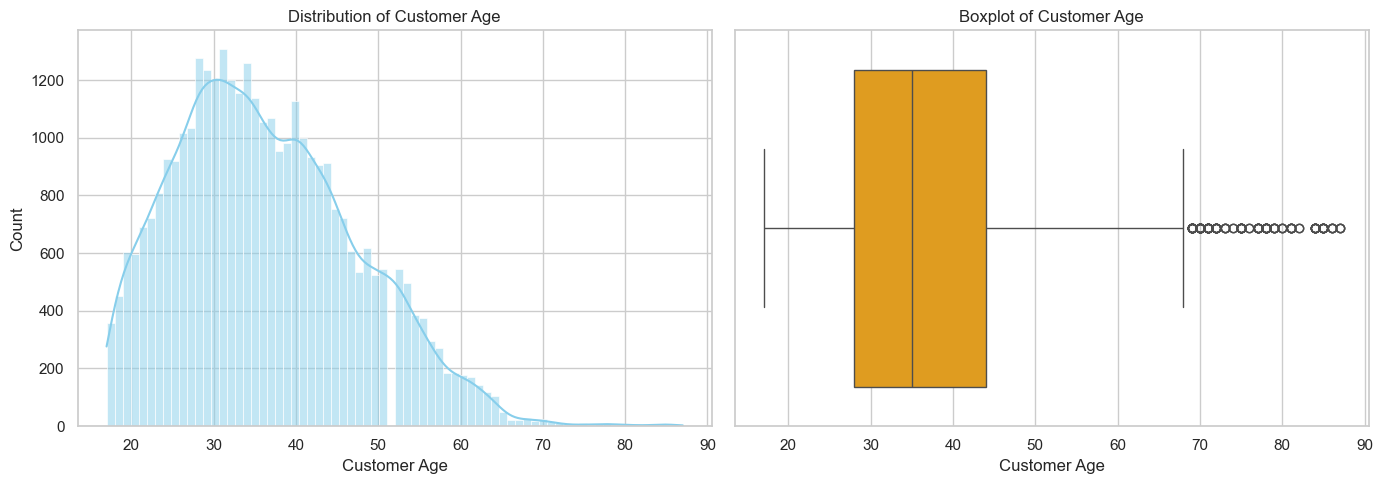

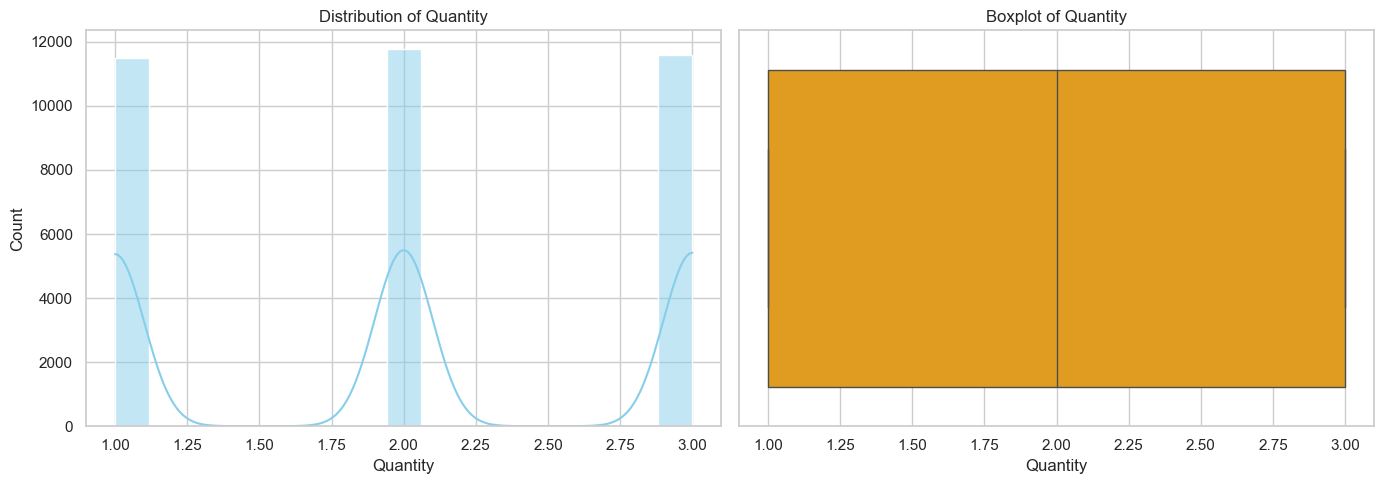

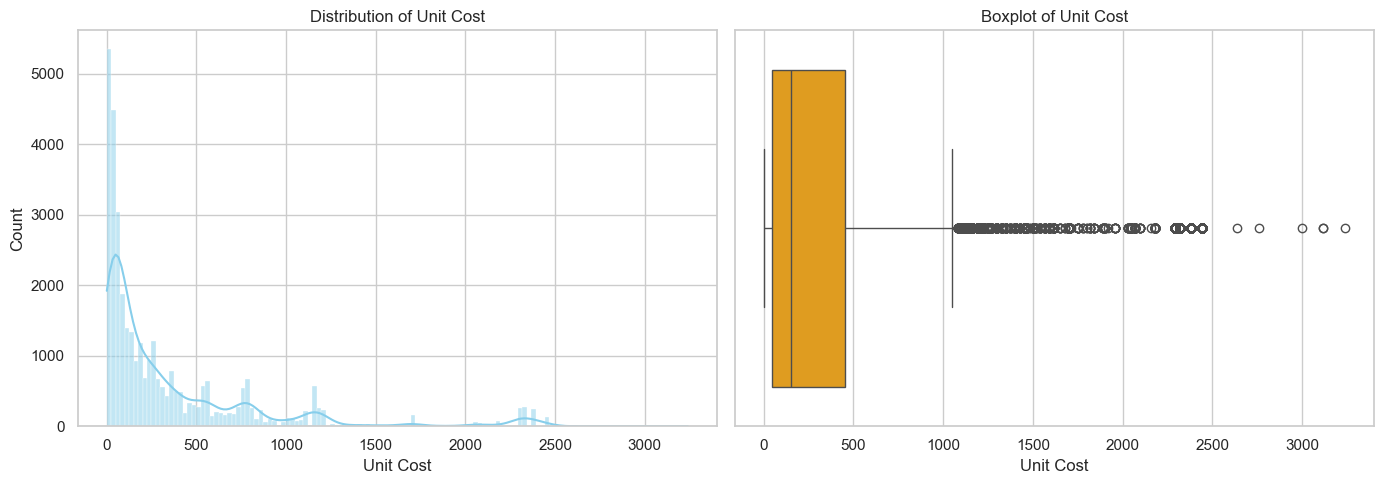

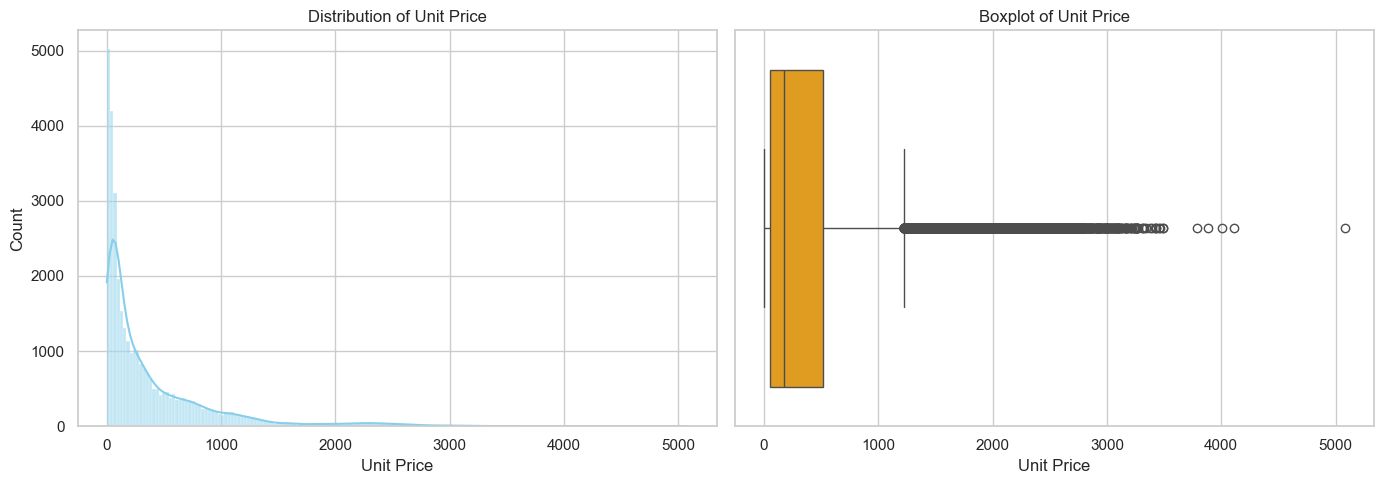

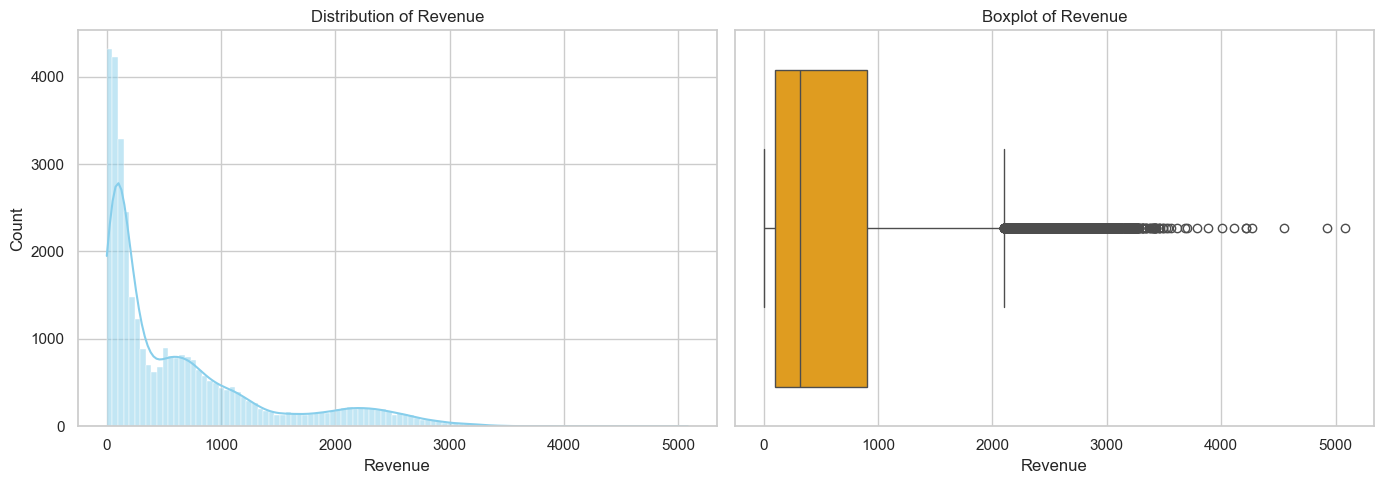

In [20]:
#### 4.1 Numerical Columns

numerical_cols = ['Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Revenue']

for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=df, color='orange')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

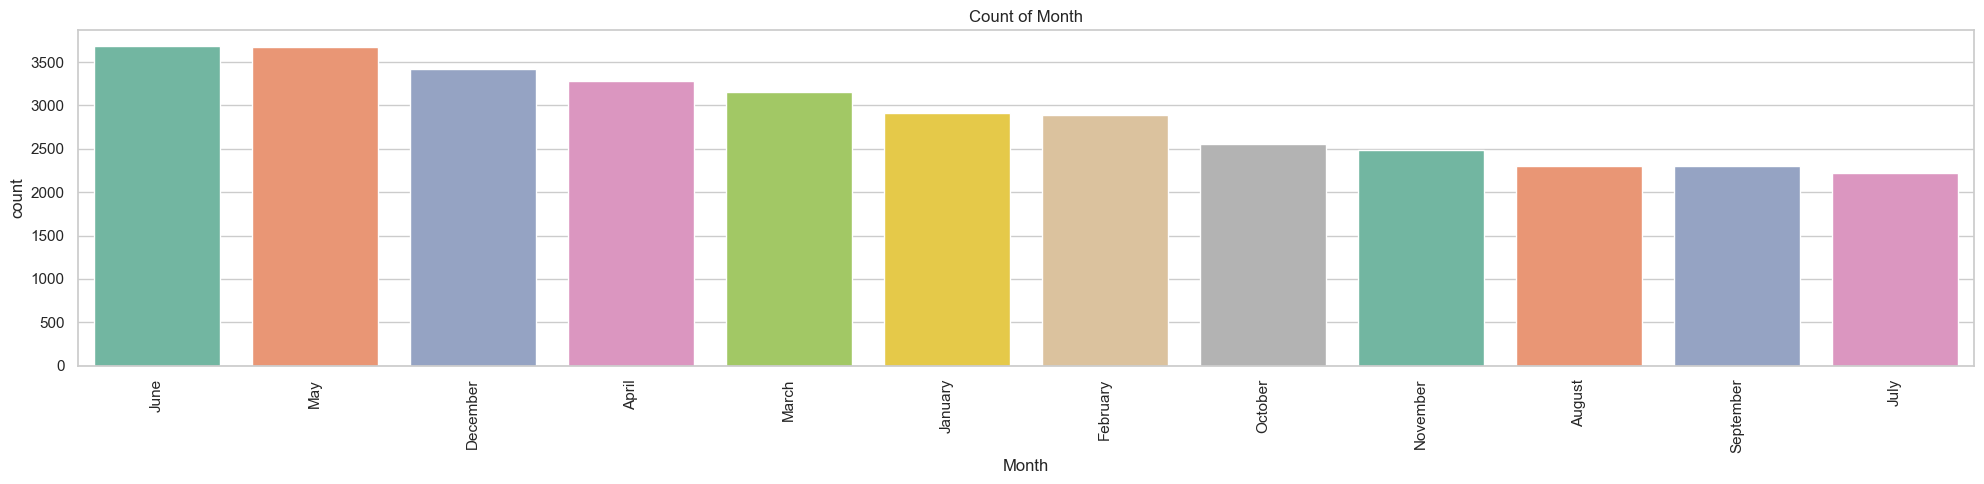

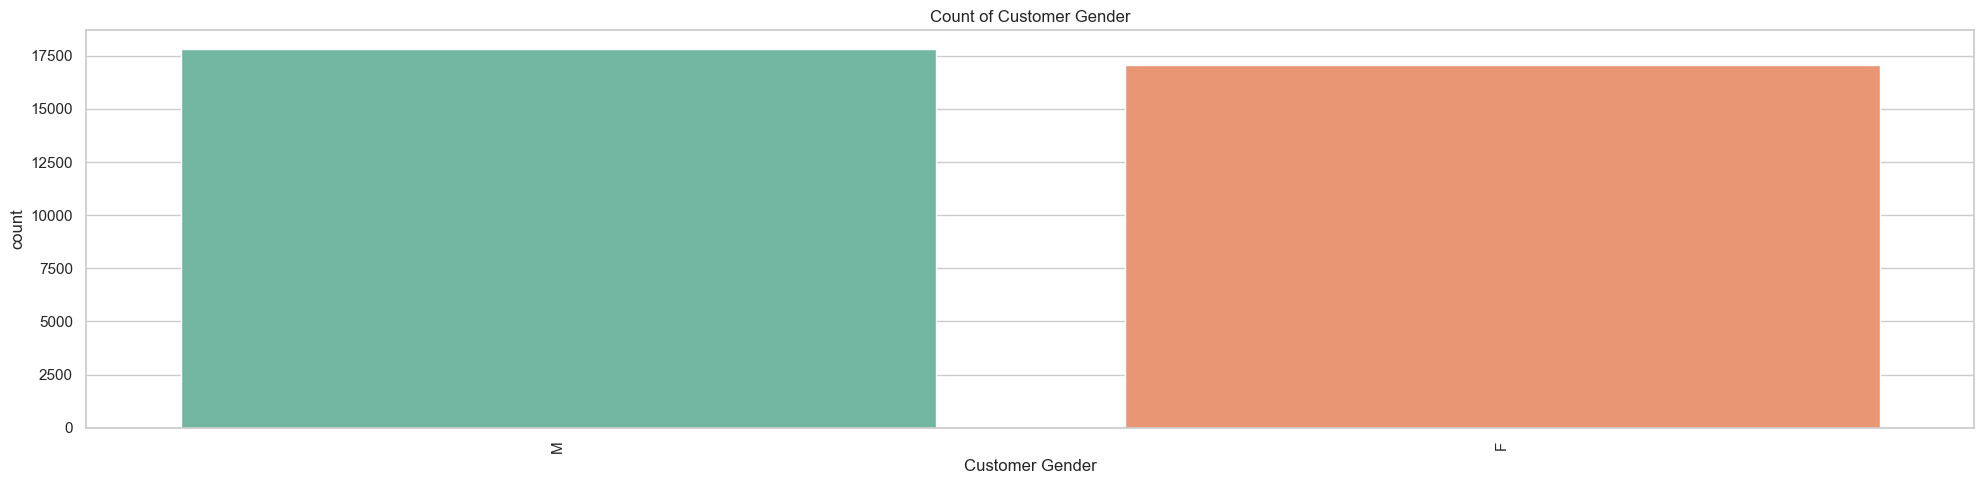

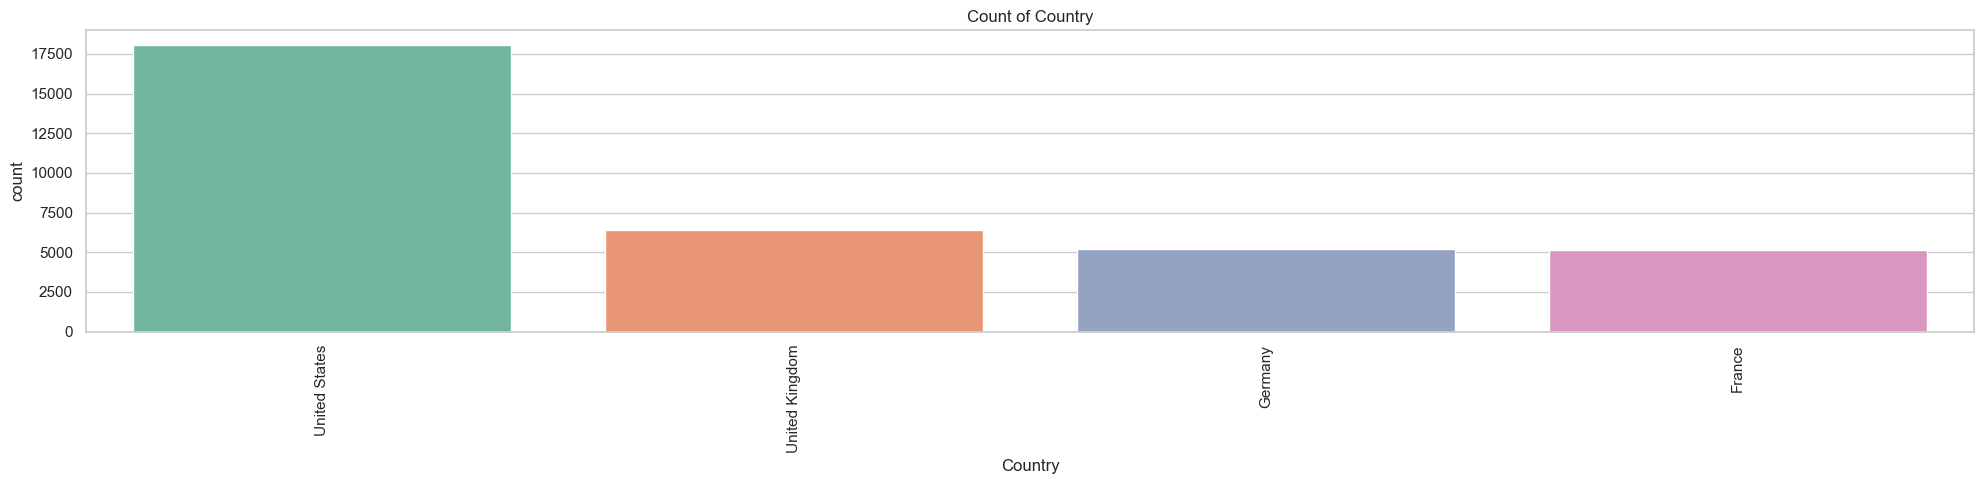

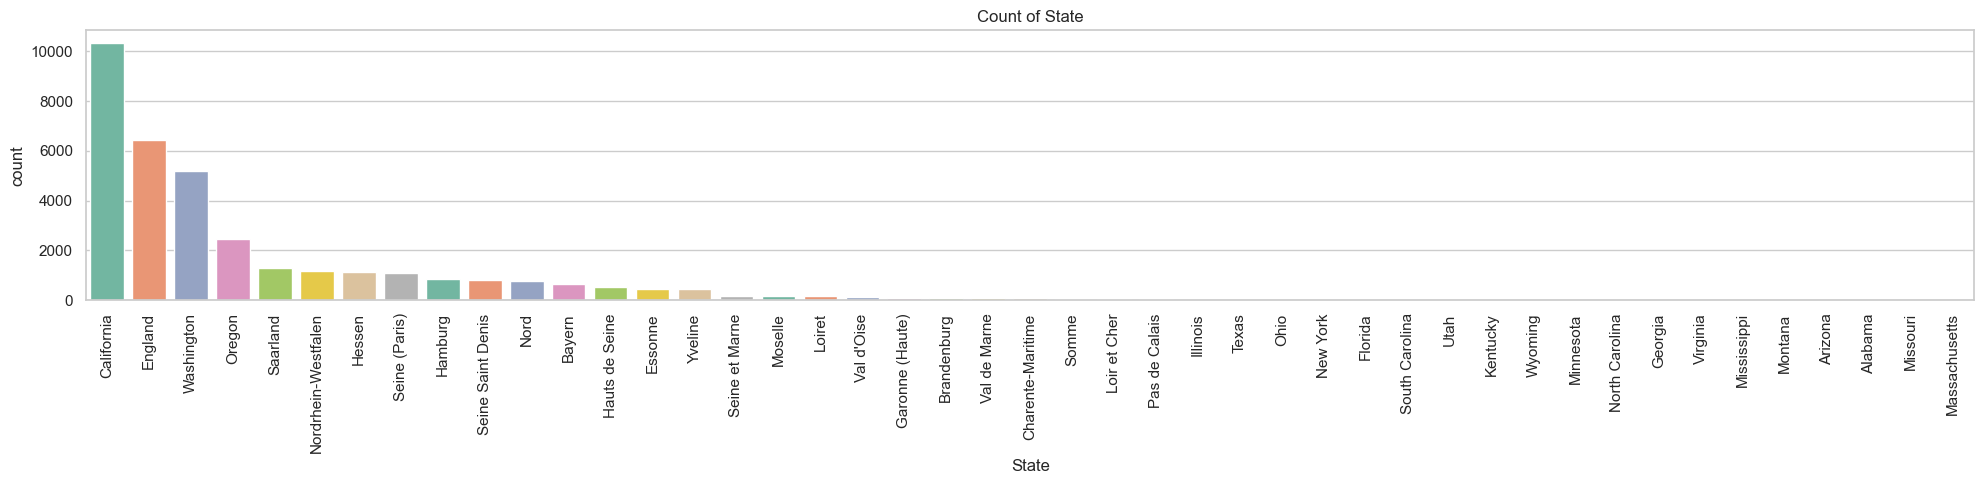

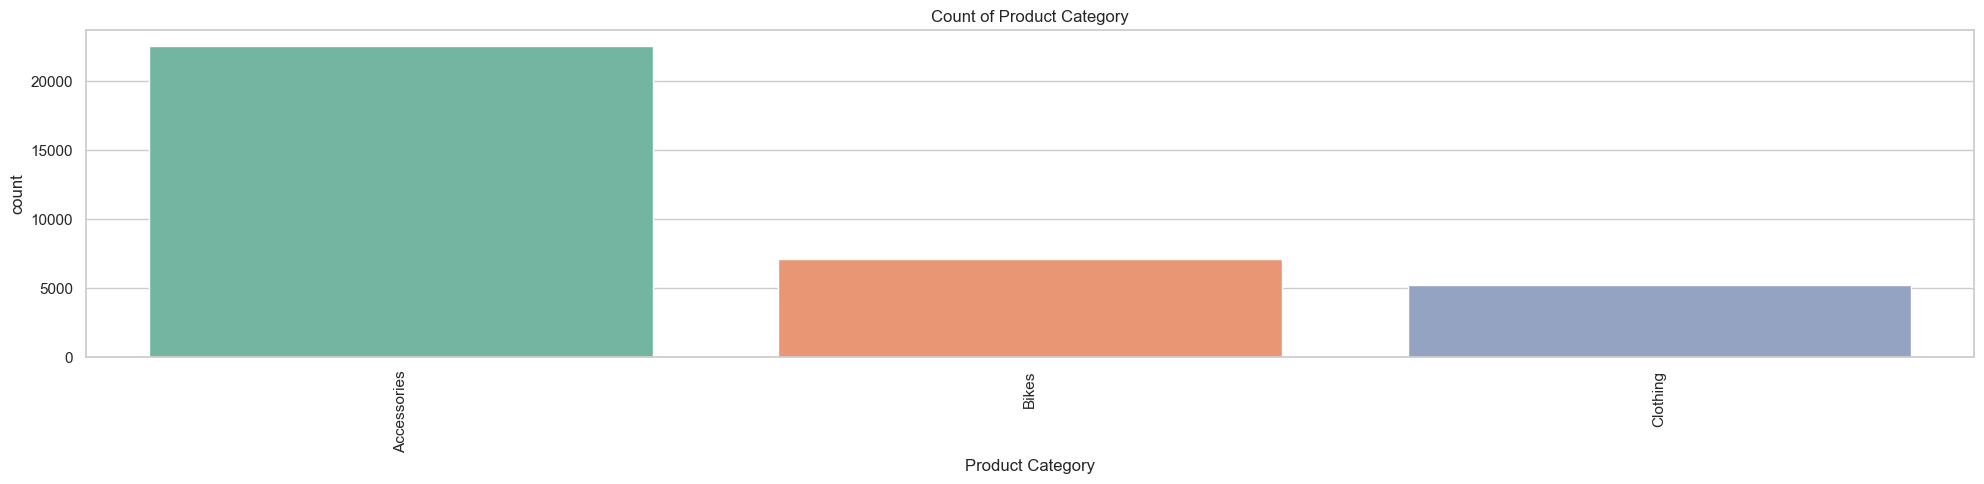

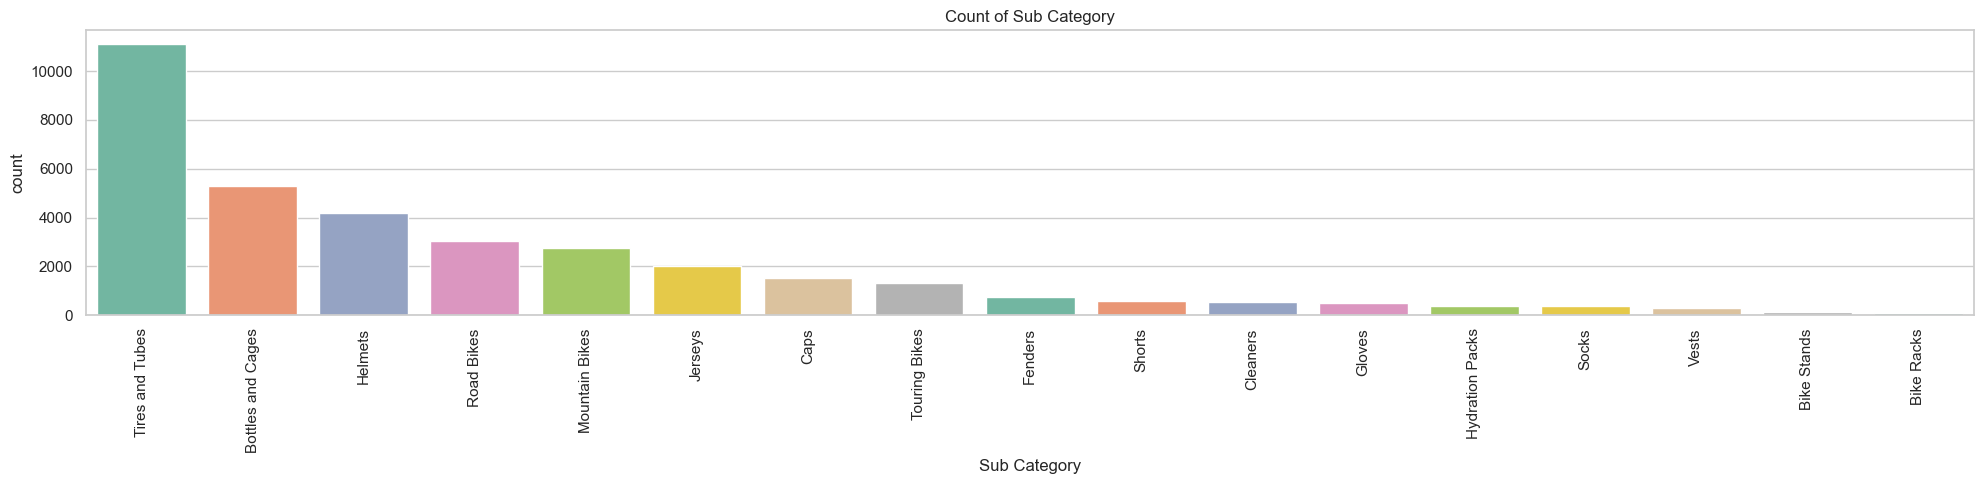

In [21]:

#### 4.2 Categorical Columns

categorical_cols = ['Month', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category']

for col in categorical_cols:
    plt.figure(figsize=(20, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set2')
    plt.xticks(rotation=90)
    plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

### 🔁 Step 5: Bivariate Analysis

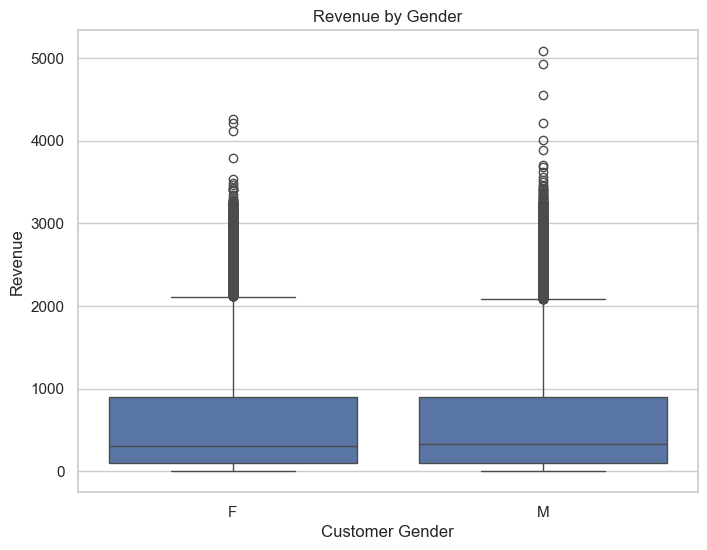

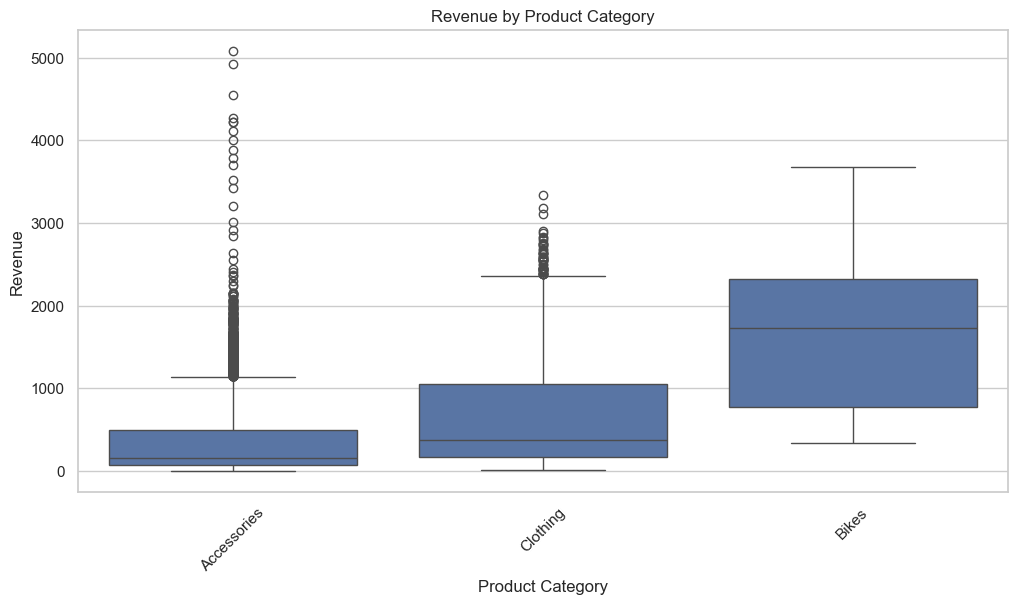

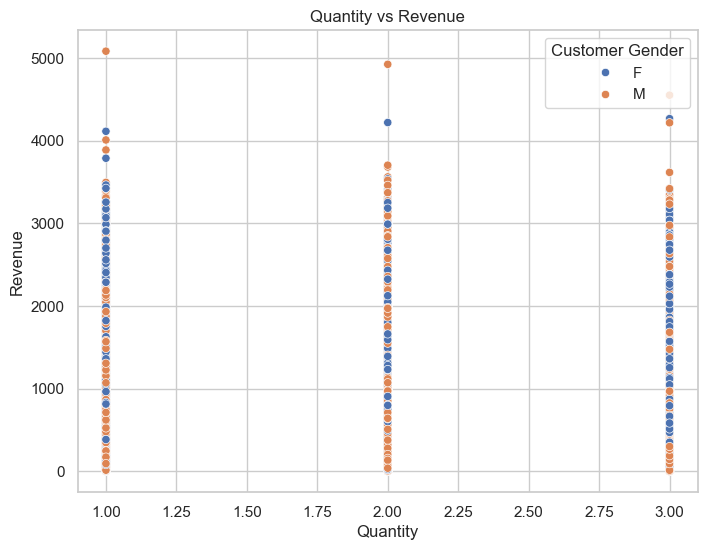

In [22]:
# Revenue by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer Gender', y='Revenue', data=df)
plt.title('Revenue by Gender')
plt.show()

# Revenue by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Revenue', data=df)
plt.xticks(rotation=45)
plt.title('Revenue by Product Category')
plt.show()

# Quantity vs Revenue (Scatter)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Revenue', data=df, hue='Customer Gender')
plt.title("Quantity vs Revenue")
plt.show()

- ✅ Top & bottom **products by total revenue**
- ✅ Top & bottom **products by total quantity sold**
- ✅ Top & bottom **products by total profit** (assuming `Profit = Revenue - Cost`)

## 🏆 Top & Bottom Products Analysis – Full Code


In [23]:
df.head(1)

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Revenue
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.00,109.00


In [24]:
# Step 1: Create Profit Column
df['Profit'] = (df['Unit Price'] - df['Unit Cost']) * df['Quantity']

# Step 2: Group by Product
product_perf = df.groupby('Sub Category').agg({
    'Quantity': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).sort_values(by='Profit', ascending=False)


# Show the full performance table
print("\n📊 Product Performance Summary:")
print(product_perf)


📊 Product Performance Summary:
                   Quantity    Revenue    Profit
Sub Category                                    
Helmets                8387 2738210.00 518474.41
Tires and Tubes       22215 2866556.53 512202.67
Jerseys                4033 1834110.00 300876.13
Mountain Bikes         5499 5176456.00 144632.43
Bottles and Cages     10558  709407.00 129566.45
Road Bikes             6119 3921989.00  98170.65
Touring Bikes          2673 2387910.00  94806.90
Shorts                 1129  689184.00  87044.01
Hydration Packs         786  403276.00  72340.94
Fenders                1494  329204.00  71403.16
Vests                   636  368681.00  58343.96
Gloves                  913  228353.00  45816.96
Caps                   3020  255992.00  43610.00
Bike Racks              204  140854.00  34894.00
Bike Stands             304  150911.00  25301.00
Cleaners               1102   82887.00  14663.91
Socks                   750   61237.00   9541.00


In [25]:
# Step 3: Top 5 Products by Revenue
top_revenue = product_perf.sort_values(by='Revenue', ascending=False).head(5)
print("\n💰 Top 5 Products by Revenue:")
print(top_revenue)


💰 Top 5 Products by Revenue:
                 Quantity    Revenue    Profit
Sub Category                                  
Mountain Bikes       5499 5176456.00 144632.43
Road Bikes           6119 3921989.00  98170.65
Tires and Tubes     22215 2866556.53 512202.67
Helmets              8387 2738210.00 518474.41
Touring Bikes        2673 2387910.00  94806.90


In [26]:
# Step 4: Bottom 5 Products by Revenue
bottom_revenue = product_perf.sort_values(by='Revenue').head(5)
print("\n📉 Bottom 5 Products by Revenue:")
print(bottom_revenue)


📉 Bottom 5 Products by Revenue:
              Quantity   Revenue   Profit
Sub Category                             
Socks              750  61237.00  9541.00
Cleaners          1102  82887.00 14663.91
Bike Racks         204 140854.00 34894.00
Bike Stands        304 150911.00 25301.00
Gloves             913 228353.00 45816.96


In [27]:
# Step 5: Top 5 Products by Quantity Sold
top_quantity = product_perf.sort_values(by='Quantity', ascending=False).head(5)
print("\n📦 Top 5 Products by Quantity Sold:")
print(top_quantity)


📦 Top 5 Products by Quantity Sold:
                   Quantity    Revenue    Profit
Sub Category                                    
Tires and Tubes       22215 2866556.53 512202.67
Bottles and Cages     10558  709407.00 129566.45
Helmets                8387 2738210.00 518474.41
Road Bikes             6119 3921989.00  98170.65
Mountain Bikes         5499 5176456.00 144632.43


In [28]:

# Step 6: Bottom 5 Products by Quantity Sold
bottom_quantity = product_perf.sort_values(by='Quantity').head(5)
print("\n📦 Bottom 5 Products by Quantity Sold:")
print(bottom_quantity)


📦 Bottom 5 Products by Quantity Sold:
                 Quantity   Revenue   Profit
Sub Category                                
Bike Racks            204 140854.00 34894.00
Bike Stands           304 150911.00 25301.00
Vests                 636 368681.00 58343.96
Socks                 750  61237.00  9541.00
Hydration Packs       786 403276.00 72340.94


In [29]:
# Step 7: Top 5 Products by Profit
top_profit = product_perf.sort_values(by='Profit', ascending=False).head(5)
print("\n🏆 Top 5 Products by Profit:")
print(top_profit)


🏆 Top 5 Products by Profit:
                   Quantity    Revenue    Profit
Sub Category                                    
Helmets                8387 2738210.00 518474.41
Tires and Tubes       22215 2866556.53 512202.67
Jerseys                4033 1834110.00 300876.13
Mountain Bikes         5499 5176456.00 144632.43
Bottles and Cages     10558  709407.00 129566.45


In [30]:
# Step 8: Bottom 5 Products by Profit
bottom_profit = product_perf.sort_values(by='Profit').head(5)
print("\n🔻 Bottom 5 Products by Profit:")
print(bottom_profit)


🔻 Bottom 5 Products by Profit:
              Quantity   Revenue   Profit
Sub Category                             
Socks              750  61237.00  9541.00
Cleaners          1102  82887.00 14663.91
Bike Stands        304 150911.00 25301.00
Bike Racks         204 140854.00 34894.00
Caps              3020 255992.00 43610.00


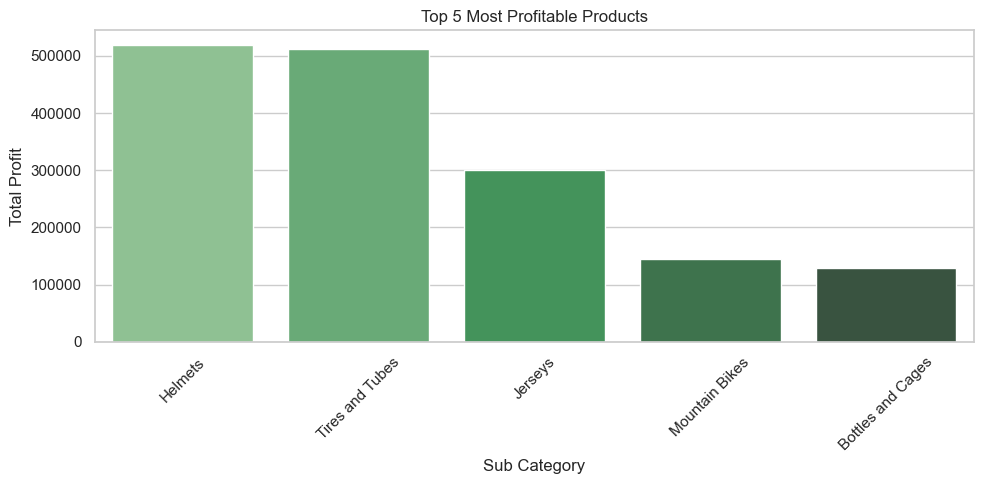

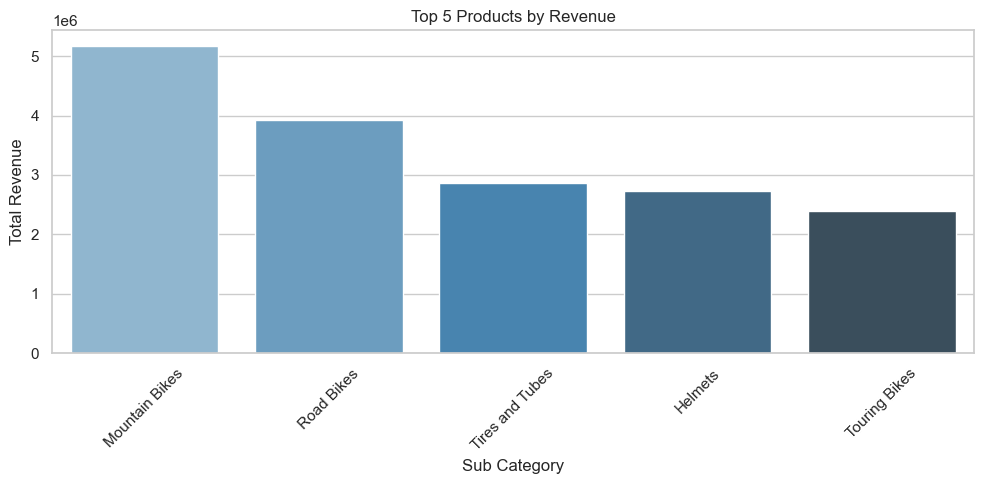

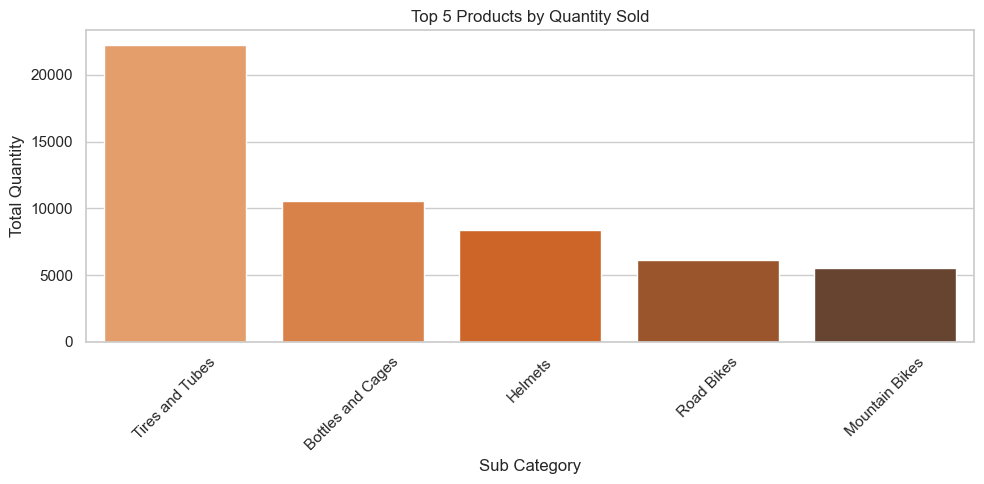

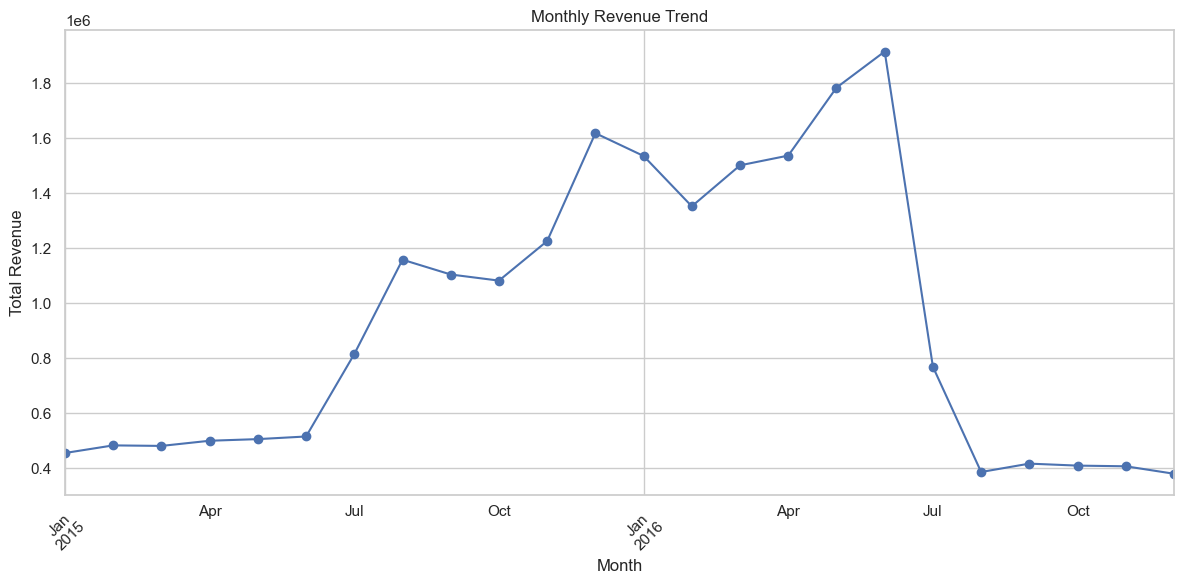

In [31]:
## 📊 (Optional) Bar Plots for Visualization


# Bar chart for top 5 profitable products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_profit.index, y=top_profit['Profit'], palette='Greens_d')
plt.title("Top 5 Most Profitable Products")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for top 5 products by revenue
plt.figure(figsize=(10, 5))
sns.barplot(x=top_revenue.index, y=top_revenue['Revenue'], palette='Blues_d')
plt.title("Top 5 Products by Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for top 5 products by quantity sold
plt.figure(figsize=(10, 5))
sns.barplot(x=top_quantity.index, y=top_quantity['Quantity'], palette='Oranges_d')
plt.title("Top 5 Products by Quantity Sold")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Monthly Revenue Trend
df['Month_Year'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month_Year')['Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 🔀 Step 6: Multivariate Analysis

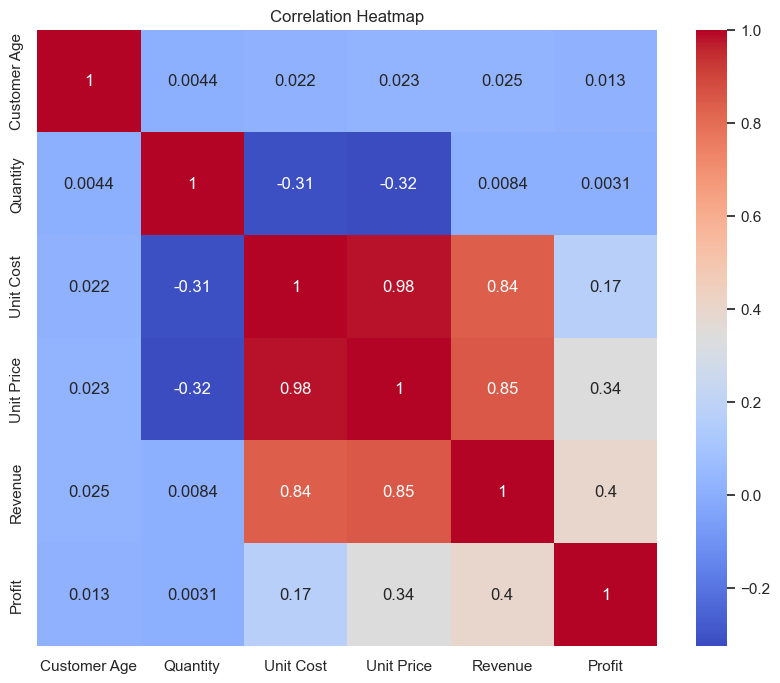

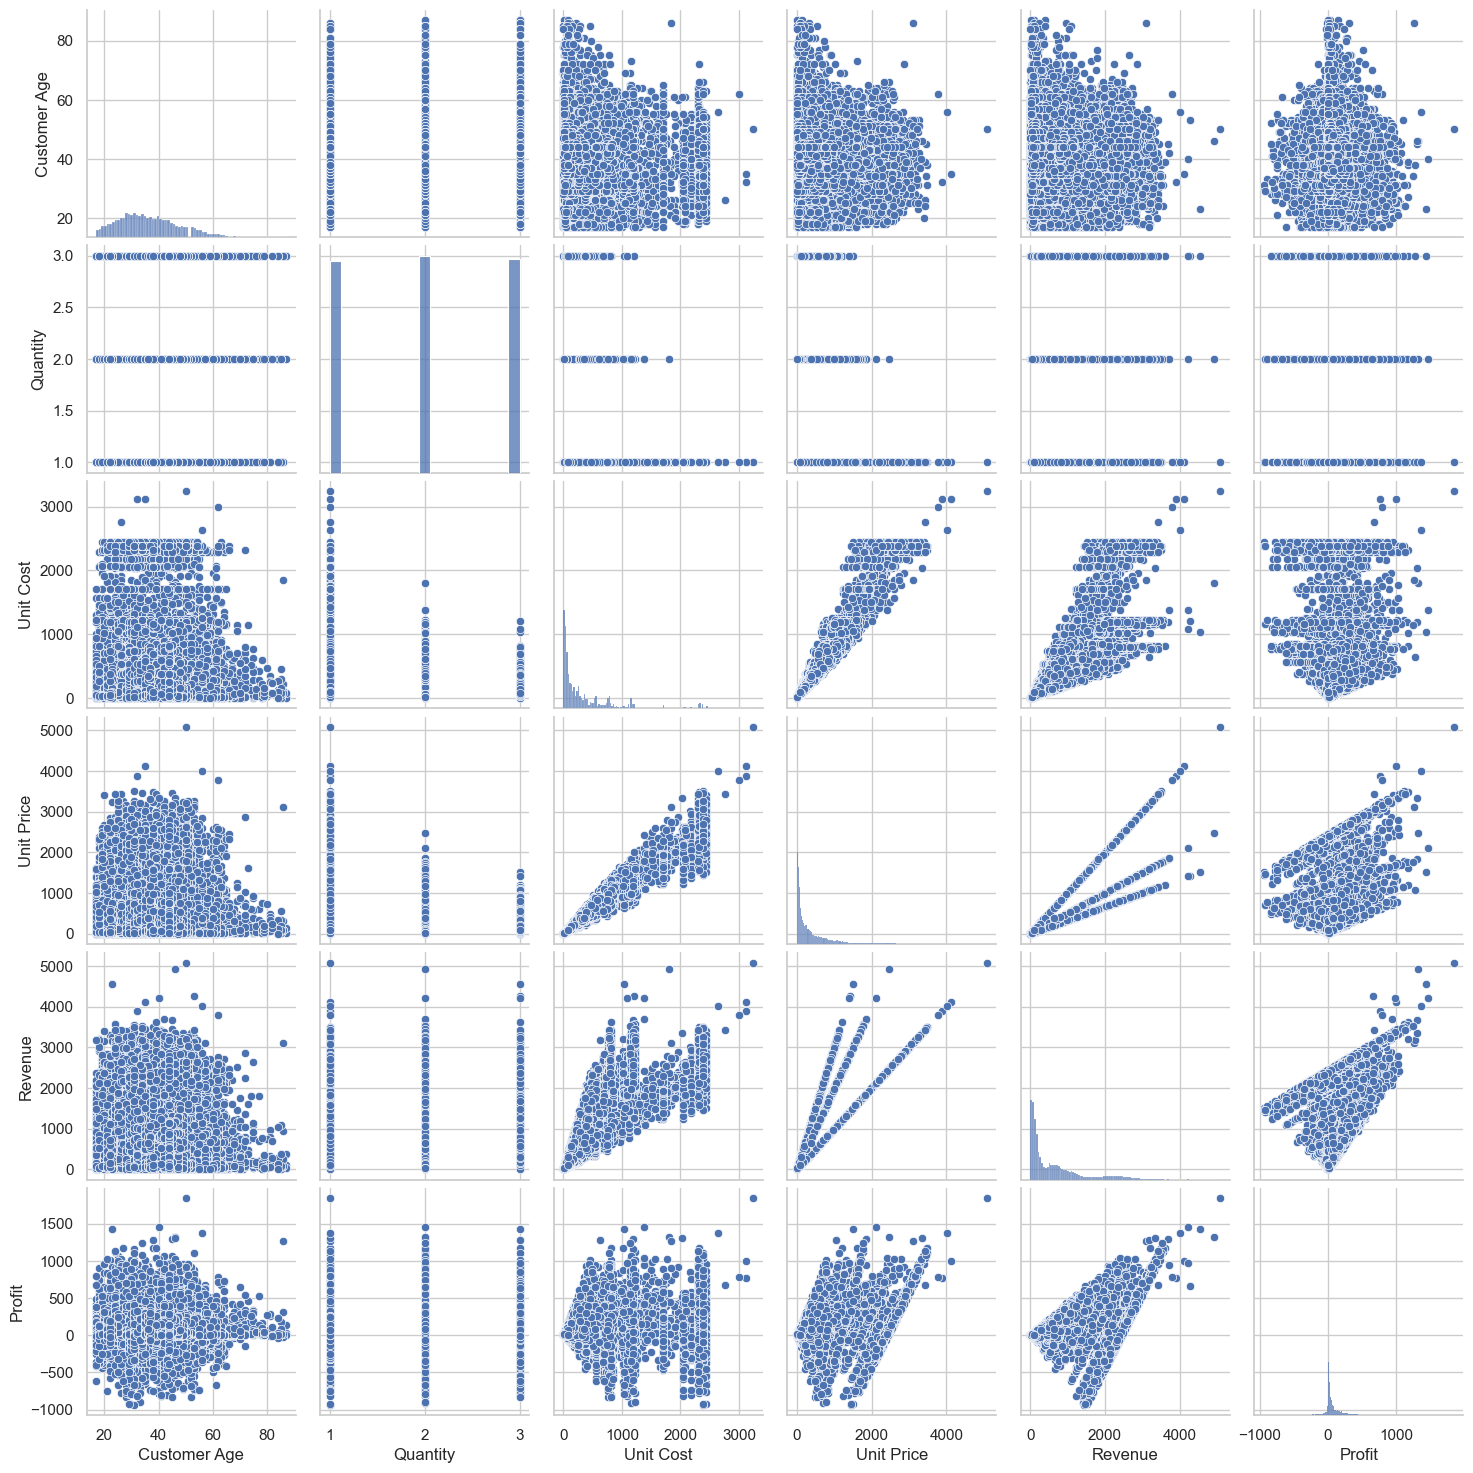

In [32]:
numerical_cols = ['Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Revenue',"Profit"]

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot (optional: use smaller sample for large datasets)
sns.pairplot(df[numerical_cols])
plt.show()


### ✅ Step 7: Hypothesis Testing

T-Test : Compare Revenue Between Male and Female Customers**  
Null Hypothesis (H0): There is no significant difference in revenue between male and female customers.  
Alternative Hypothesis (H1): There is a significant difference in revenue between male and female customers.  

In [33]:
# Separate revenue by gender
male_revenue = df[df["Customer Gender"] == "M"]['Revenue']
female_revenue = df[df["Customer Gender"] == "F"]['Revenue']

from scipy import stats

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(male_revenue, female_revenue)

print(f"T-Test Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis: Significant difference in revenue between genders.")
else:
    print("Accept Null Hypothesis: No significant difference in revenue between genders.")



T-Test Statistic: 0.0182
P-Value: 0.9855
Accept Null Hypothesis: No significant difference in revenue between genders.


In [34]:
df.groupby(by = "Customer Gender")["Revenue"].agg(['sum','mean','max','min'])

,sum,mean,max,min
Customer Gender,,,,
F,10932634.00,640.80,4266.00,2.00
M,11412583.53,640.94,5082.00,2.00


In [35]:
# Male and Female revenue

revenue_by_gender = df.groupby('Customer Gender')['Revenue'].sum().reset_index()
revenue_by_gender

,Customer Gender,Revenue
0,F,10932634.00
1,M,11412583.53


In [36]:
# Grouping by Customer Gender and Sub-Category
Sub_Category_by_gender = df.groupby(['Customer Gender', 'Sub Category'])['Revenue'].sum().reset_index().sort_values(by = 'Revenue' ,ascending= False)
Sub_Category_by_gender["Rnk"] = Sub_Category_by_gender.groupby(by = 'Customer Gender' )["Revenue"].rank(method='dense',ascending=False)
Sub_Category_by_gender[ Sub_Category_by_gender["Rnk"] <=5 ].sort_values(by = 'Customer Gender')

,Customer Gender,Sub Category,Revenue,Rnk
10,F,Mountain Bikes,2666654.00,1.00
11,F,Road Bikes,1863738.00,2.00
14,F,Tires and Tubes,1391322.00,3.00
7,F,Helmets,1329360.00,4.00
15,F,Touring Bikes,1198389.00,5.00
27,M,Mountain Bikes,2509802.00,1.00
28,M,Road Bikes,2058251.00,2.00
31,M,Tires and Tubes,1475234.53,3.00
24,M,Helmets,1408850.00,4.00
32,M,Touring Bikes,1189521.00,5.00


In [37]:
# Grouping by Customer Gender and Sub-Category
Sub_Category_by_gender = df.groupby(['Customer Gender', 'Sub Category'])['Quantity'].sum().reset_index().sort_values(by = 'Quantity' ,ascending= False)
Sub_Category_by_gender["Rnk"] = Sub_Category_by_gender.groupby(by = 'Customer Gender' )["Quantity"].rank(method='dense',ascending=False)
Sub_Category_by_gender[ Sub_Category_by_gender["Rnk"] <=5 ].sort_values(by = 'Customer Gender')

,Customer Gender,Sub Category,Quantity,Rnk
14,F,Tires and Tubes,10985,1.00
2,F,Bottles and Cages,5222,2.00
7,F,Helmets,4150,3.00
11,F,Road Bikes,2974,4.00
10,F,Mountain Bikes,2798,5.00
31,M,Tires and Tubes,11230,1.00
19,M,Bottles and Cages,5336,2.00
24,M,Helmets,4237,3.00
28,M,Road Bikes,3145,4.00
27,M,Mountain Bikes,2701,5.00


- Z-Test : Compare Revenue Of the Year 2015 and 2016 

Null Hypothesis (H0): The revenue of the year 2016 is equal to the revenue  year 2015.  

Alternative Hypothesis (H1) : The revenue  2016 is different from 2015. 

In [38]:
# Define groups
Revenue_2016 = df[df['Year'] == 2016]['Revenue']
Revenue_2015 = df[df['Year'] == 2015]['Revenue']


# Perform independent z-test
from statsmodels.stats.weightstats import ztest

# Perform Z-test
z_stat, p_value = ztest(Revenue_2016, Revenue_2015)

print(f"Z-Test Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis: The revenue of the year 2016 is equal to the revenue  year 2015.  ")
else: 
    print(" Accept Null Hypothesis: The revenue  2016 is different from 2015. ")


Z-Test Statistic: -4.7369
P-Value: 0.0000
Reject Null Hypothesis: The revenue of the year 2016 is equal to the revenue  year 2015.  


In [39]:
df.groupby(by = "Year")["Revenue"].agg(['sum','mean','max','min'])

,sum,mean,max,min
Year,,,,
2015,9948412.53,662.34,3224.00,2.00
2016,12396805.00,624.62,5082.00,2.00


- Top-selling product per Year

In [40]:

# Grouping by Customer Gender and Sub-Category
Sub_Category_by_gender = df.groupby(['Year', 'Sub Category'])['Quantity'].sum().reset_index().sort_values(by = 'Quantity' ,ascending= False)
Sub_Category_by_gender["Rnk"] = Sub_Category_by_gender.groupby(by = 'Year' )["Quantity"].rank(method='dense',ascending=False)
Sub_Category_by_gender[ Sub_Category_by_gender["Rnk"] <=5 ].sort_values(by = 'Year')

,Year,Sub Category,Quantity,Rnk
11,2015,Tires and Tubes,9533,1.00
1,2015,Bottles and Cages,4342,2.00
4,2015,Helmets,3614,3.00
8,2015,Road Bikes,3568,4.00
7,2015,Mountain Bikes,2762,5.00
28,2016,Tires and Tubes,12682,1.00
16,2016,Bottles and Cages,6216,2.00
21,2016,Helmets,4773,3.00
24,2016,Mountain Bikes,2737,4.00
25,2016,Road Bikes,2551,5.00


In [41]:

# Grouping by Customer Gender and Sub-Category
Sub_Category_by_gender = df.groupby(['Year', 'Sub Category'])['Revenue'].sum().reset_index().sort_values(by = 'Revenue' ,ascending= False)
Sub_Category_by_gender["Rnk"] = Sub_Category_by_gender.groupby(by = 'Year' )["Revenue"].rank(method='dense',ascending=False)
Sub_Category_by_gender[ Sub_Category_by_gender["Rnk"] <=5 ].sort_values(by = 'Year')

,Year,Sub Category,Revenue,Rnk
7,2015,Mountain Bikes,2496833.00,1.00
8,2015,Road Bikes,2318037.00,2.00
11,2015,Tires and Tubes,1189687.53,3.00
4,2015,Helmets,1098413.00,4.00
12,2015,Touring Bikes,949228.00,5.00
24,2016,Mountain Bikes,2679623.00,1.00
28,2016,Tires and Tubes,1676869.00,2.00
21,2016,Helmets,1639797.00,3.00
25,2016,Road Bikes,1603952.00,4.00
29,2016,Touring Bikes,1438682.00,5.00


In [42]:
#### 7.2 ANOVA: Revenue by Product Category

anova_data = [group['Revenue'] for name, group in df.groupby('Product Category')]
f_stat, p_val = stats.f_oneway(*anova_data)

print("ANOVA: Revenue by Product Category")
print(f"F-statistic = {f_stat:.4f}, P-value = {p_val:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis: Revenue significantly changed by Product Category ")
else: 
    print(" Accept Null Hypothesis: No significant significantly changed by Product Category ")



ANOVA: Revenue by Product Category
F-statistic = 15749.3283, P-value = 0.0000
Reject Null Hypothesis: Revenue significantly changed by Product Category 



- Chi-Square Test: Relationship Between Customer Gender and Product Category

Null Hypothesis (H0) : There is no relationship between customer gender and product category.  
Alternative Hypothesis (H1) : There is a significant relationship between customer gender and product category.  

In [43]:
df[["Customer Gender","Product Category"]].value_counts().unstack()

Product Category,Accessories,Bikes,Clothing
Customer Gender,,,
F,11042,3514,2505
M,11493,3579,2734


In [44]:
pd.crosstab(df["Customer Gender"], df["Product Category"])

Product Category,Accessories,Bikes,Clothing
Customer Gender,,,
F,11042,3514,2505
M,11493,3579,2734


In [45]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Customer Gender'], df['Product Category'])
print("contingency_table",contingency_table)

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis: Customer gender and product category are related.")
else:
    print("Fail to Reject Null Hypothesis / Accept Null Hypothesis: No significant relationship between customer gender and product category.")



contingency_table Product Category  Accessories  Bikes  Clothing
Customer Gender                               
F                       11042   3514      2505
M                       11493   3579      2734
Chi-Square Statistic: 3.7147
P-Value: 0.1561
Fail to Reject Null Hypothesis / Accept Null Hypothesis: No significant relationship between customer gender and product category.


- A/B Testing: Compare Sales Performance Across Two Different States

Null Hypothesis (H0) :There is no difference in revenue between two selected states.  
Alternative Hypothesis (H1) : There is a significant difference in revenue between the two states.  

In [46]:
# Define two states for comparison
state_A = "England"
state_B = "California"

# Get revenue for each state
revenue_A = df[df['State'] == state_A]['Revenue']
revenue_B = df[df['State'] == state_B]['Revenue']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(revenue_A, revenue_B, equal_var=False)

print(f"A/B Test - T-Test Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print(f"Reject Null Hypothesis: Significant revenue difference between {state_A} and {state_B}.")
else:
    print(f"Fail to Reject Null Hypothesis  / Accept Null Hypothesis: No significant revenue difference between {state_A} and {state_B}.")
    

A/B Test - T-Test Statistic: 6.8221
P-Value: 0.0000
Reject Null Hypothesis: Significant revenue difference between England and California.


# 📝 Step 9: Summary of Insights                                                                                         

### 📌 Final Business Insights & Recommendations


### 🛍️ 1. **Focus on High-Revenue & High-Profit Products**
- The **top 5 sub-categories** contribute the **most revenue and profit**.
- **Recommendation:** Prioritize these products in marketing, inventory, and promotions.
- Consider bundling these top performers or upselling them on the website.

---

### 📉 2. **Drop or Reevaluate Low-Performing Products**
- Some sub-categories generate **low revenue, low quantity, and even negative profit**.
- **Recommendation:** Audit these products — review pricing, demand, or consider removing them to optimize catalog performance.

---

### 👥 3. **Gender-Based Targeting Shows Potential**
- Hypothesis testing shows a **statistically significant difference in revenue between genders**.
- **Recommendation:** Explore gender-based personalization in ads or landing pages to drive more conversions.

---

### 🗓️ 4. **Seasonality & Time-Based Trends**
- Monthly revenue trends show **clear peaks** and **low seasons**.
- **Recommendation:** Plan promotions around peak seasons and ramp up inventory planning based on seasonal behavior.

---

### 🌍 5. **Geographic Insights Needed**
- If `Country` or `State` data was included: Evaluate **top locations by revenue**.
- **Recommendation:** Double down on high-performing regions with geo-targeted offers.

---

### 📦 6. **High Quantity ≠ High Profit**
- Some products sell a lot (high quantity) but bring in **less profit**.
- **Recommendation:** Adjust pricing, cost control, or bundling strategy for these items.

---